Krok 0: x=79.97, y=79.91, f(x,y)=32767840.00
Krok 10: x=79.67, y=79.00, f(x,y)=31841092.00
Krok 20: x=79.37, y=78.10, f(x,y)=30948968.00
Krok 30: x=79.07, y=77.22, f(x,y)=30089876.00
Krok 40: x=78.79, y=76.36, f(x,y)=29262288.00
Krok 50: x=78.51, y=75.52, f(x,y)=28464786.00
Krok 60: x=78.23, y=74.68, f(x,y)=27696012.00
Krok 70: x=77.96, y=73.87, f(x,y)=26954674.00
Krok 80: x=77.69, y=73.07, f(x,y)=26239562.00
Krok 90: x=77.43, y=72.28, f(x,y)=25549528.00
Generowanie wykresów...


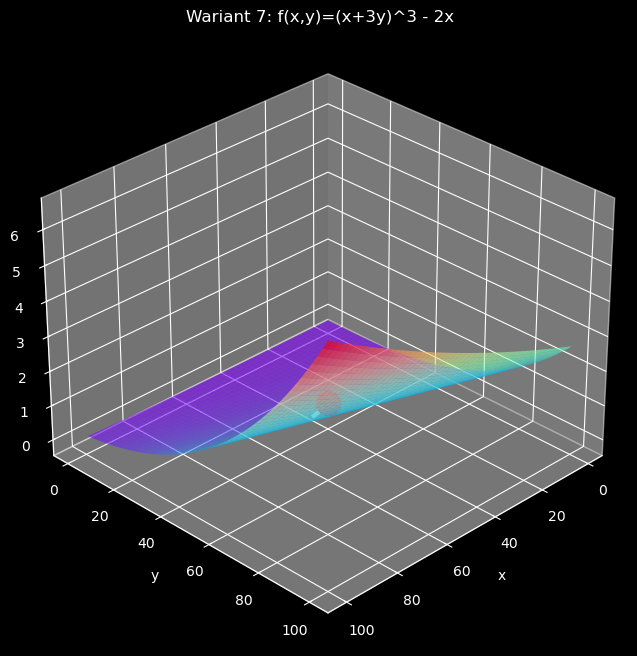

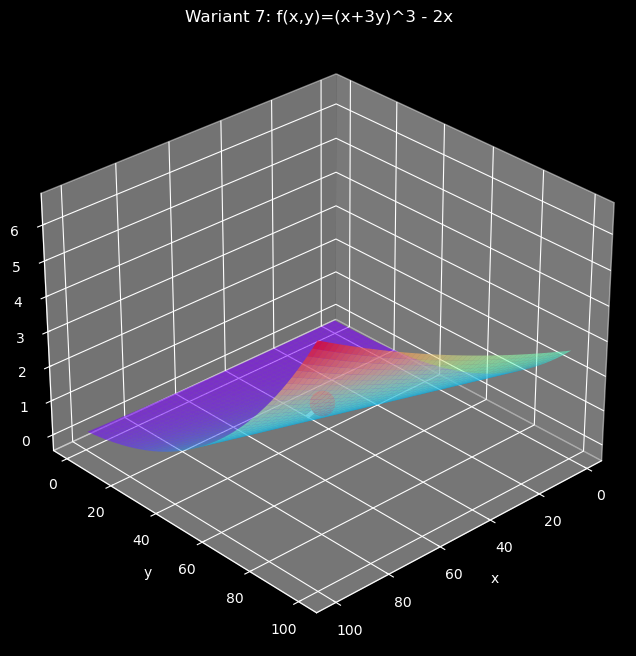

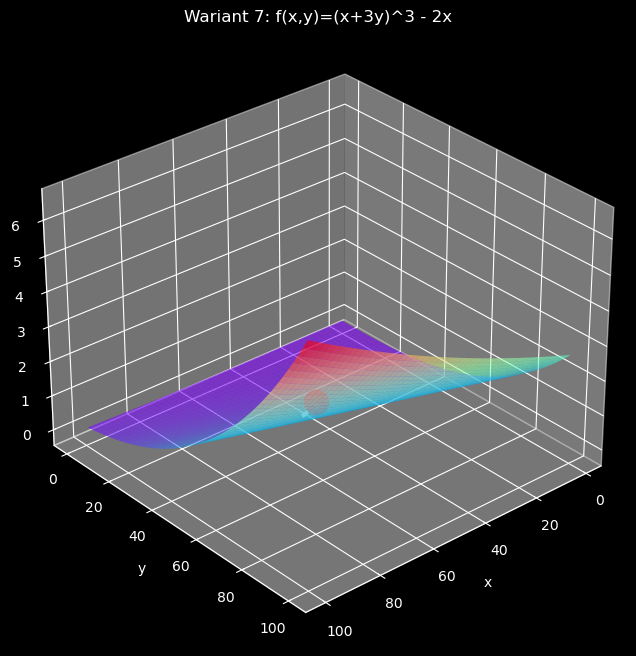

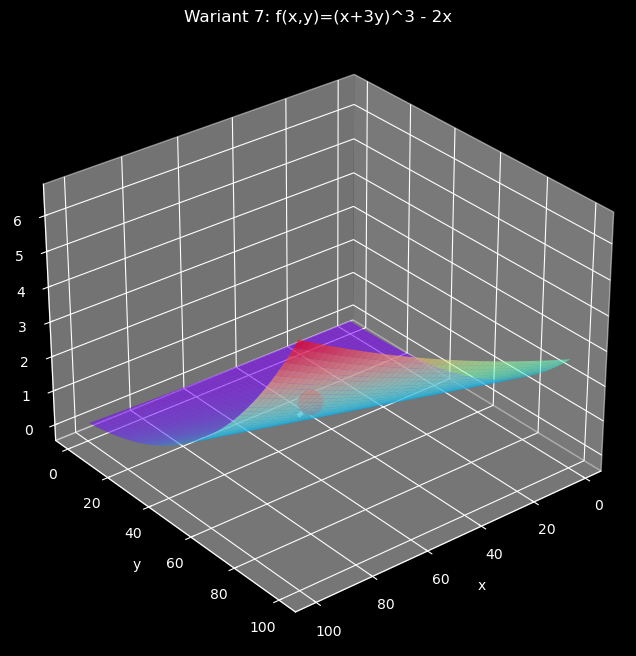

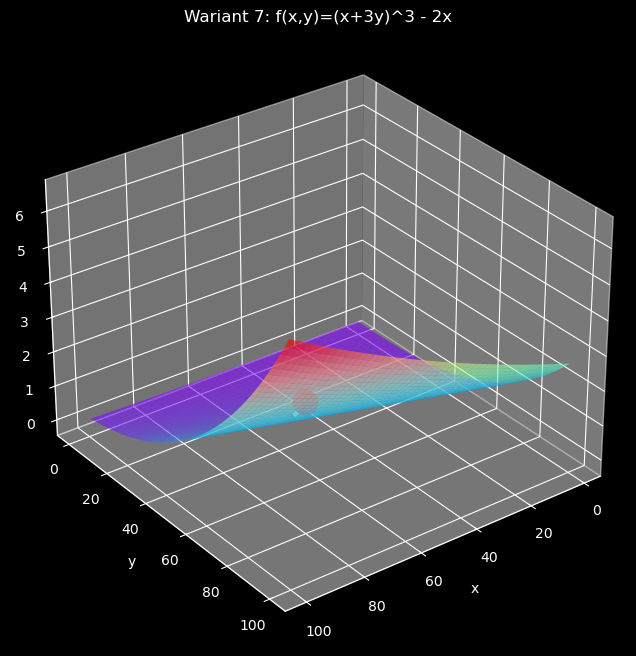

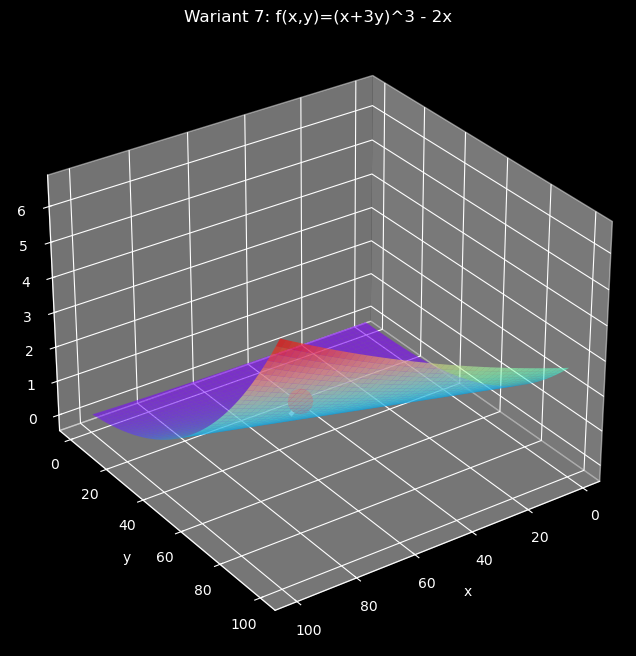

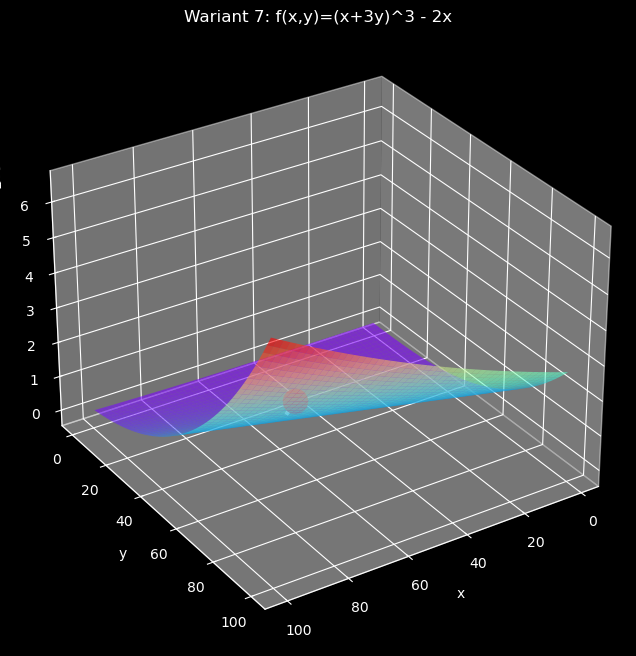

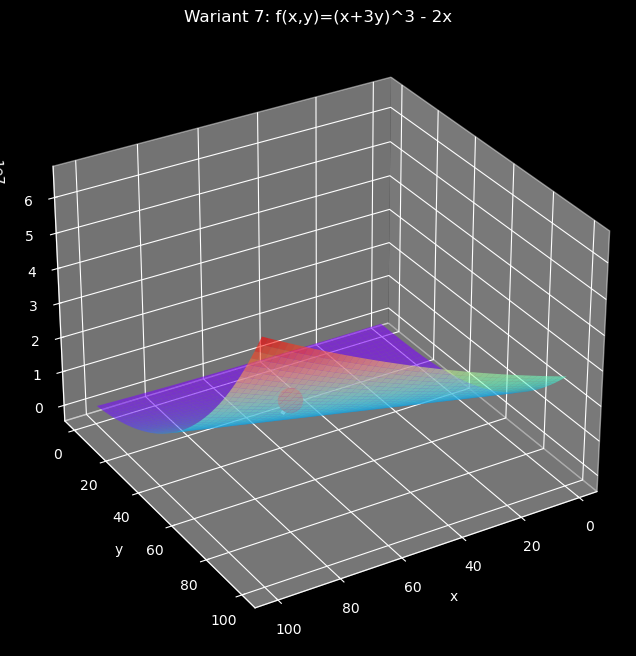

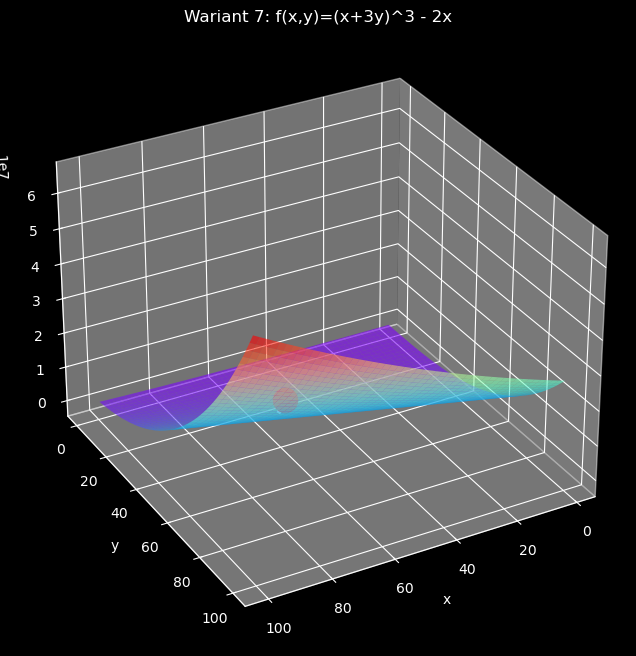

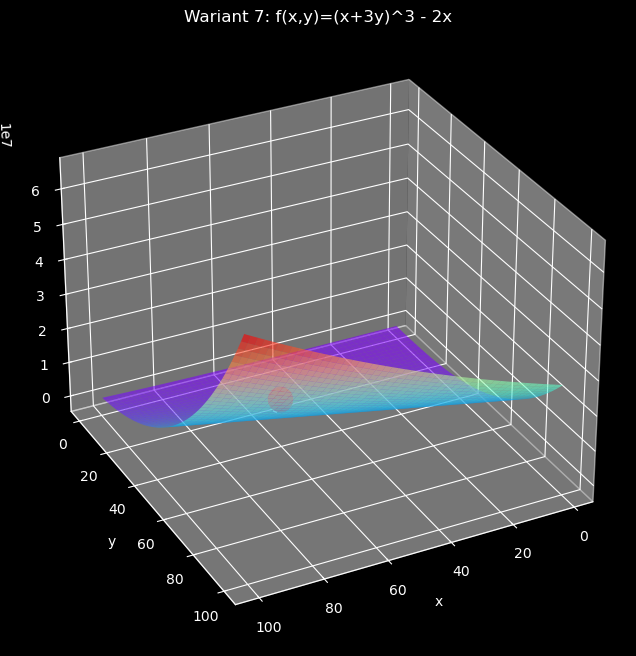

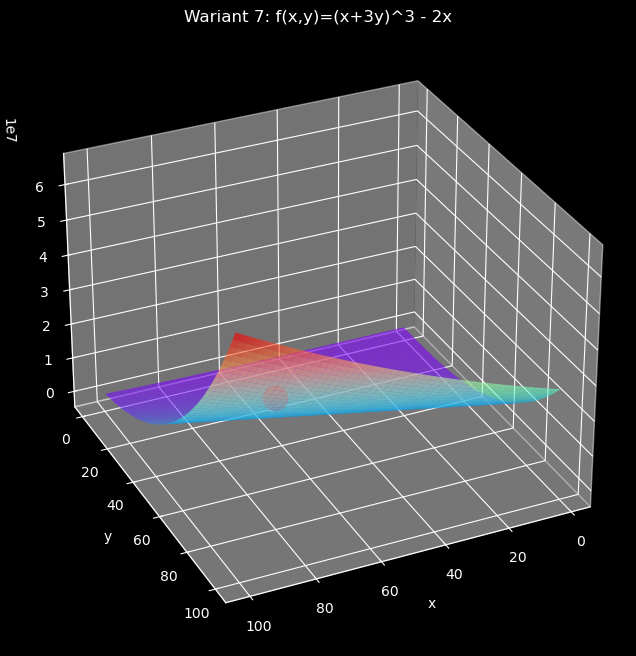

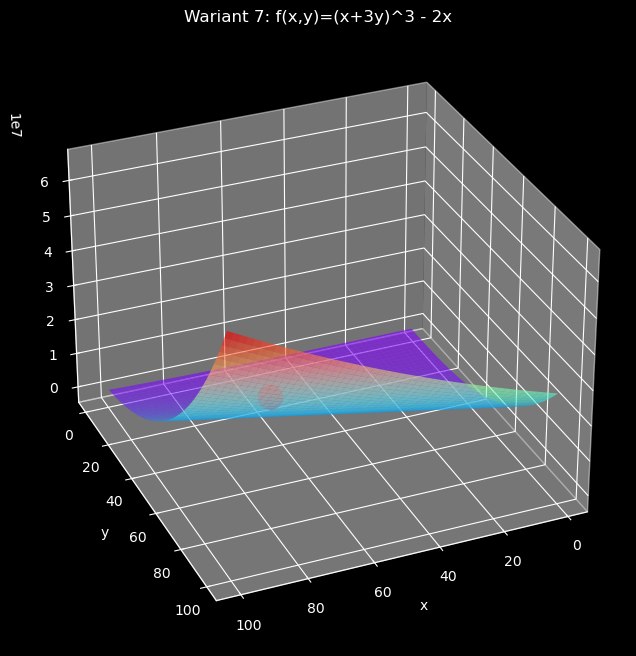

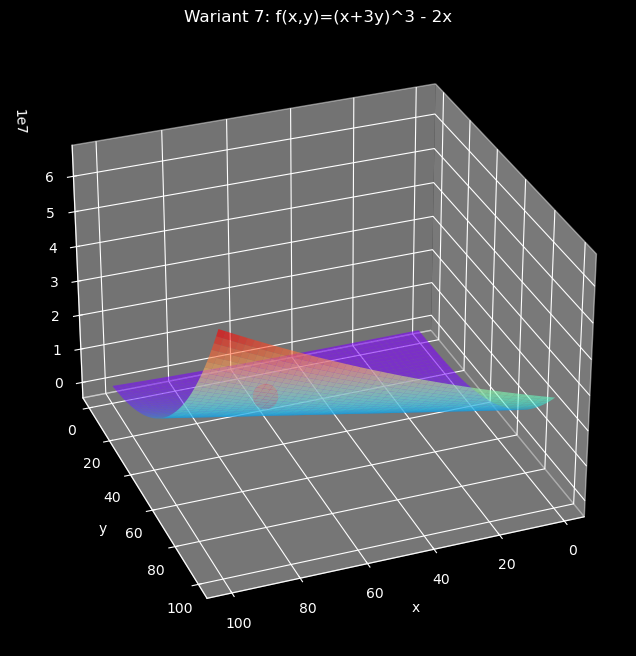

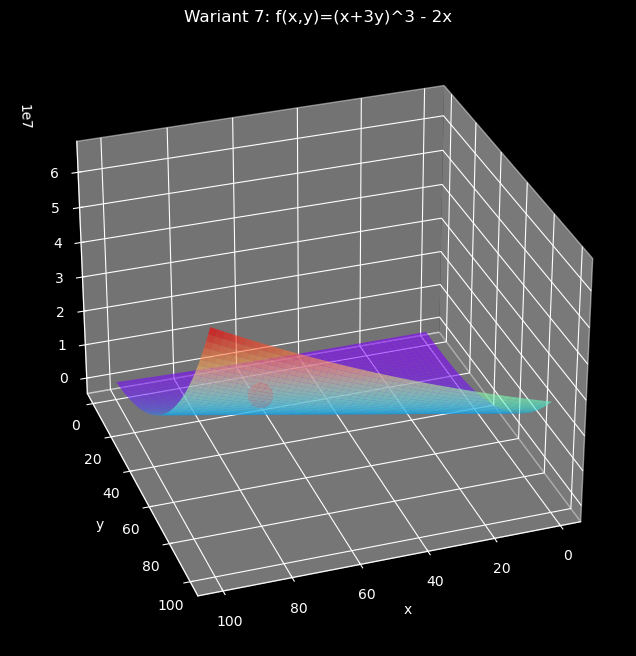

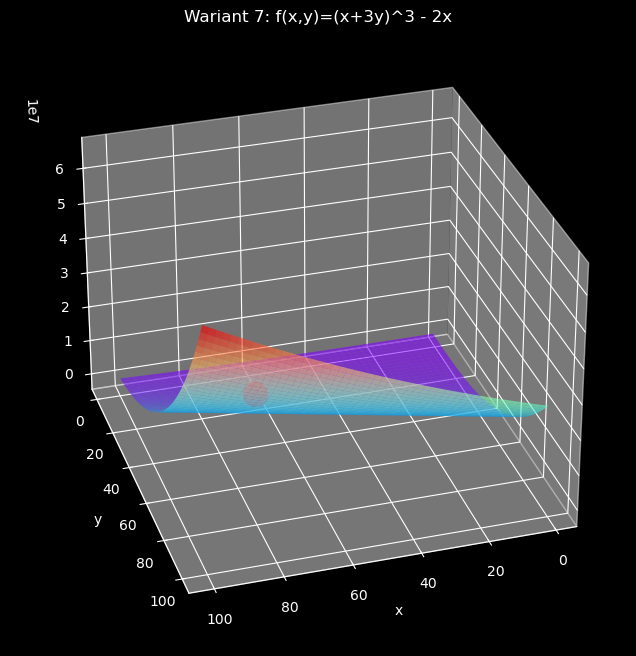

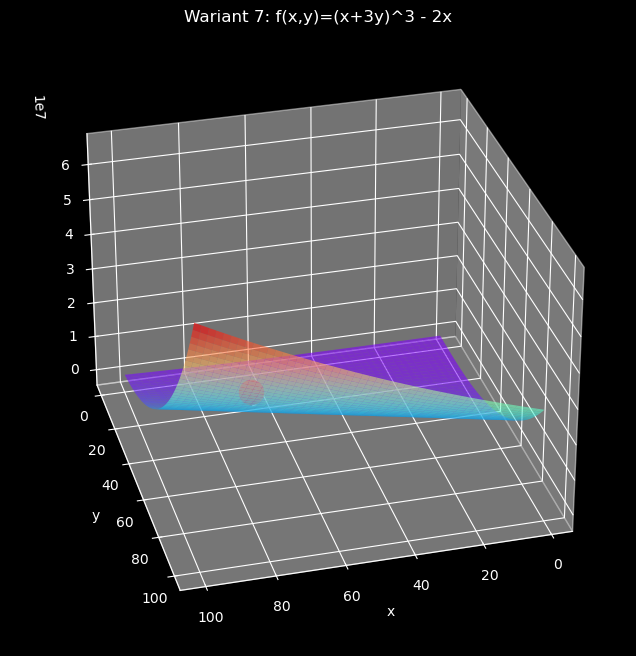

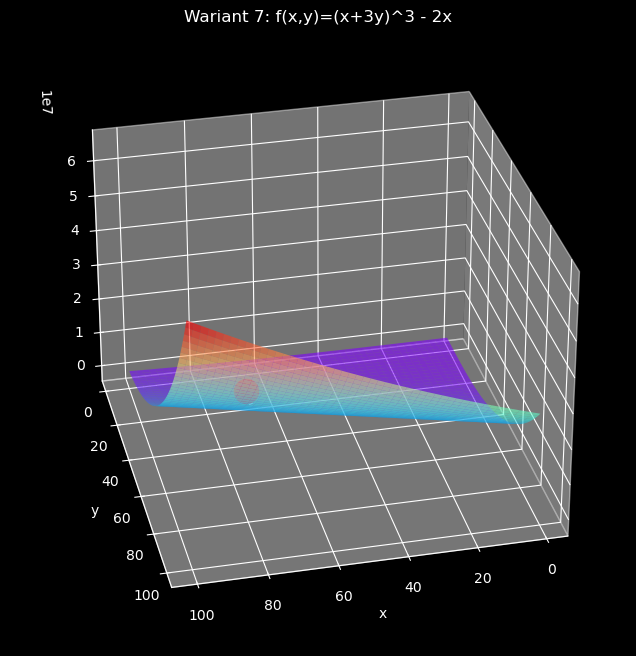

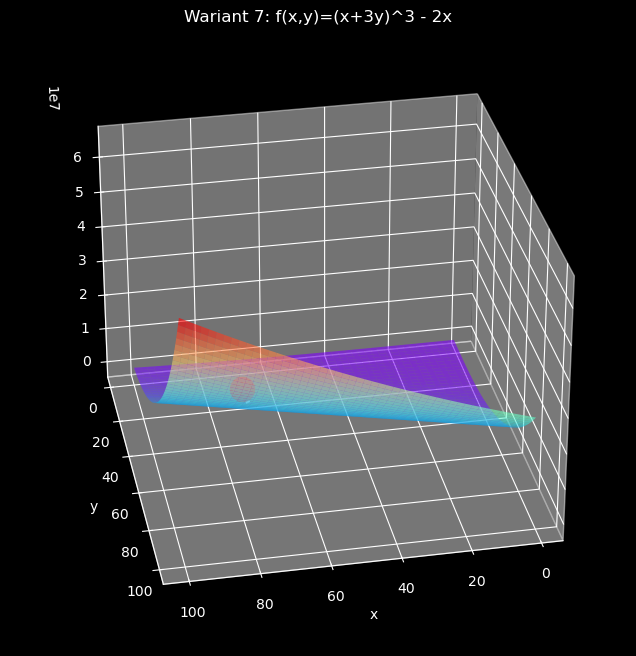

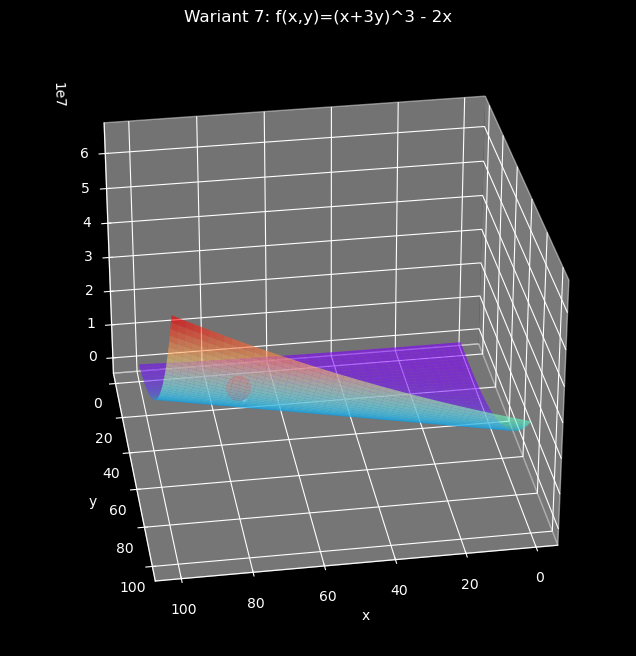

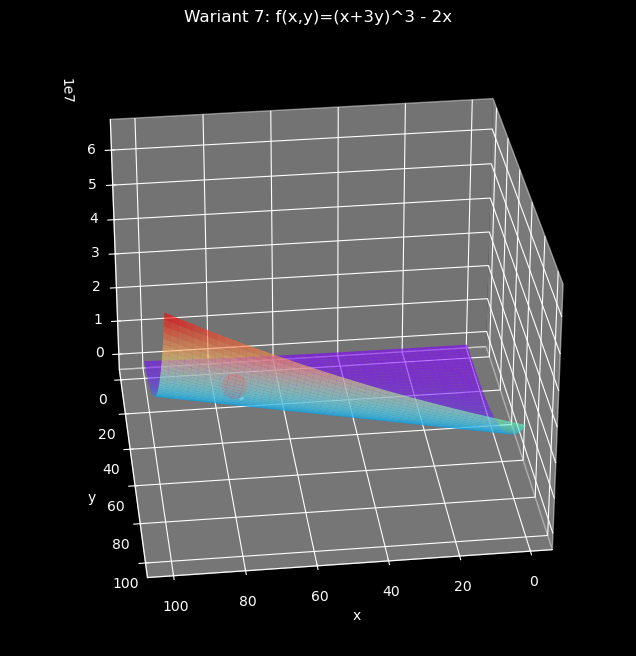

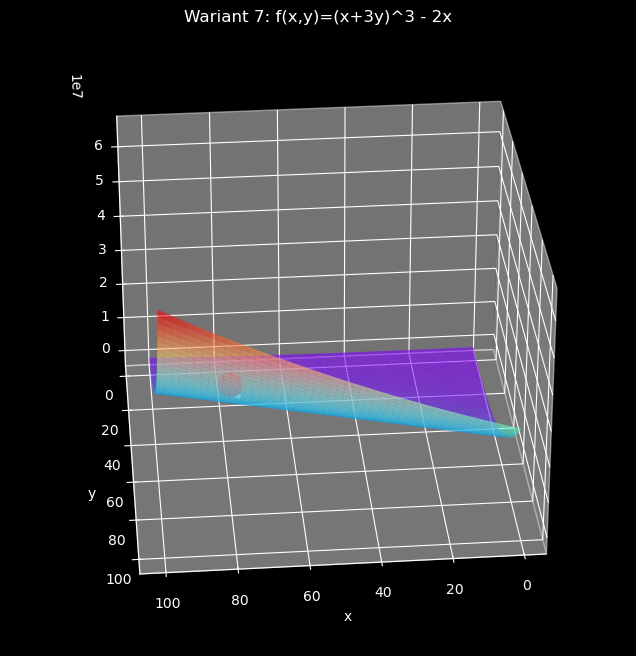

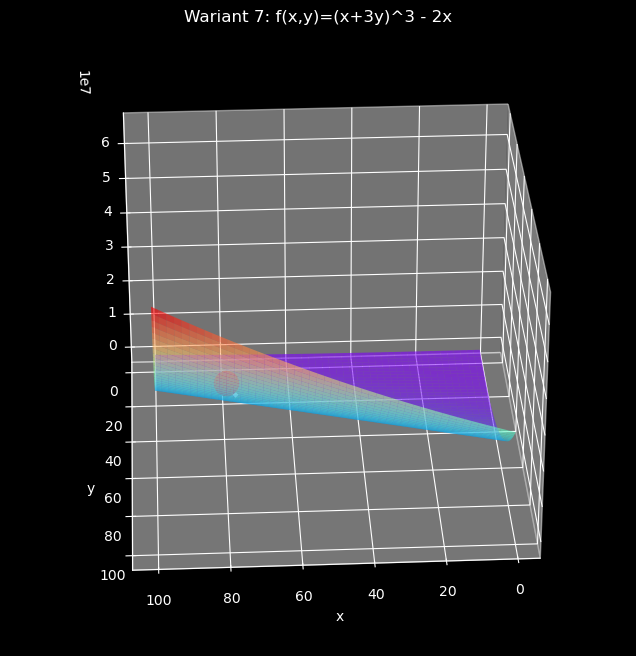

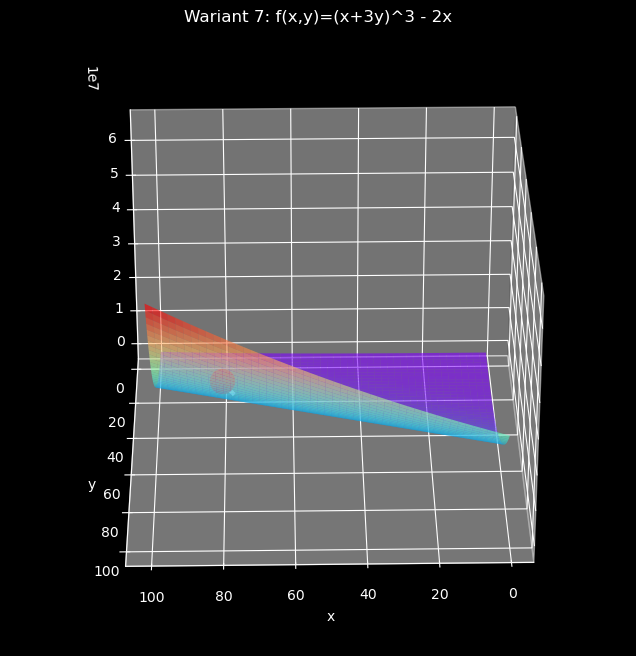

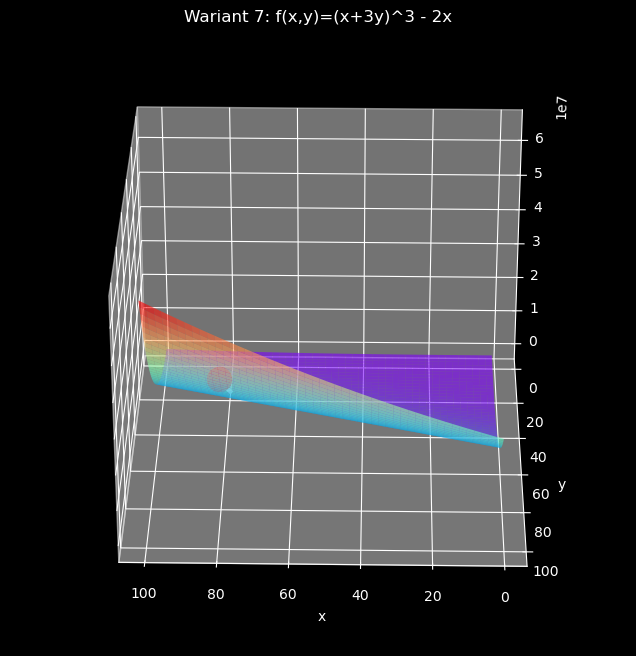

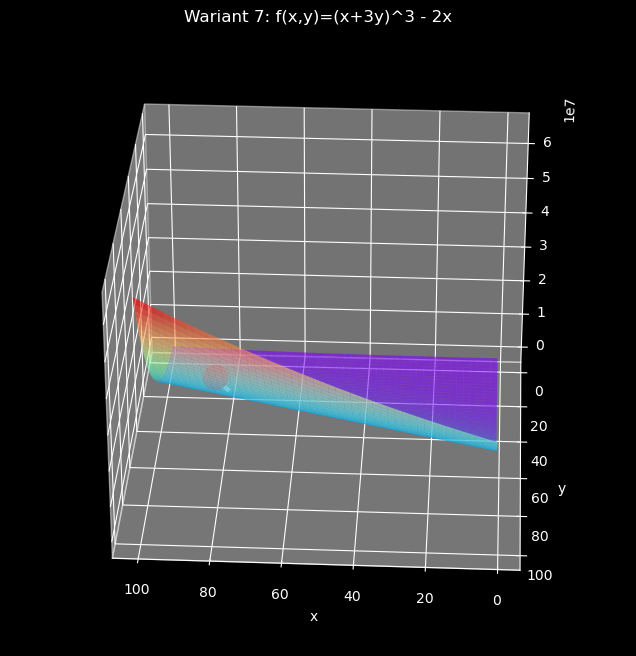

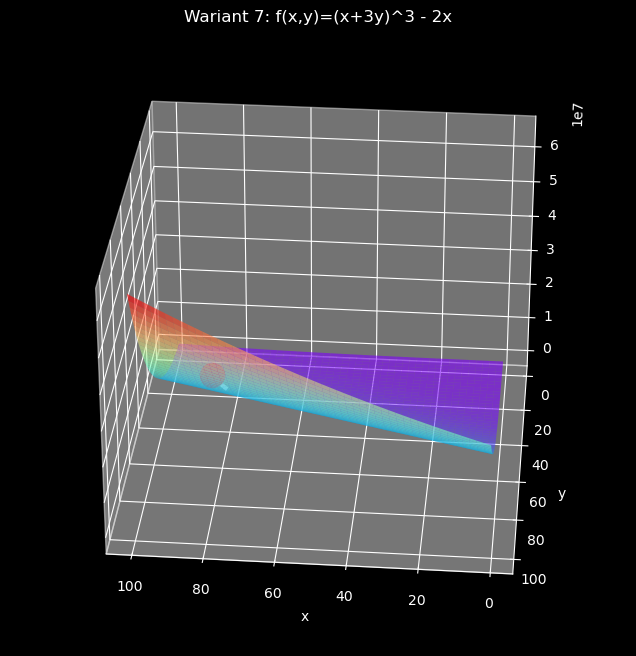

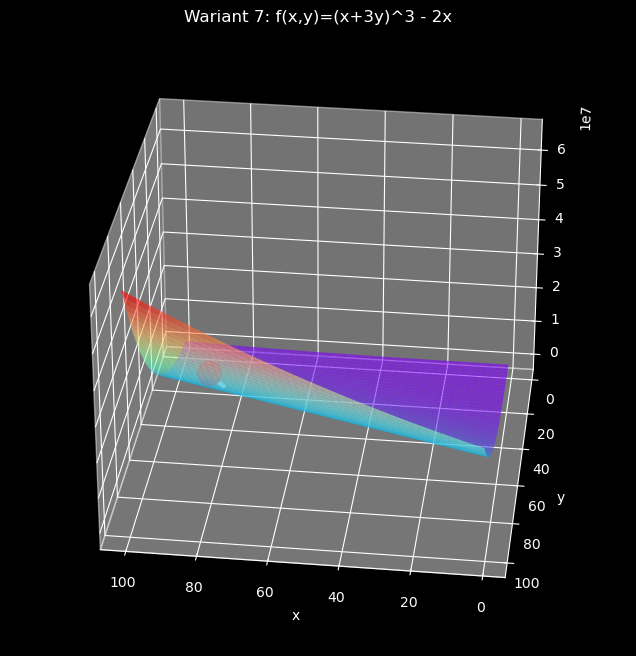

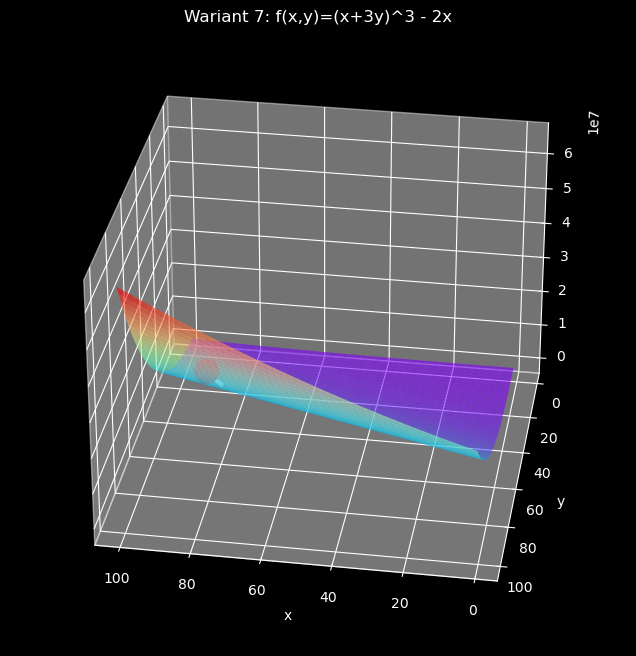

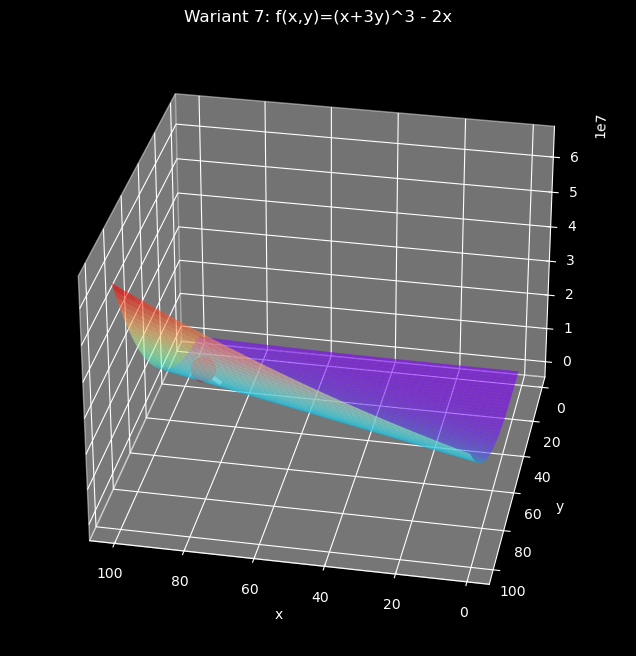

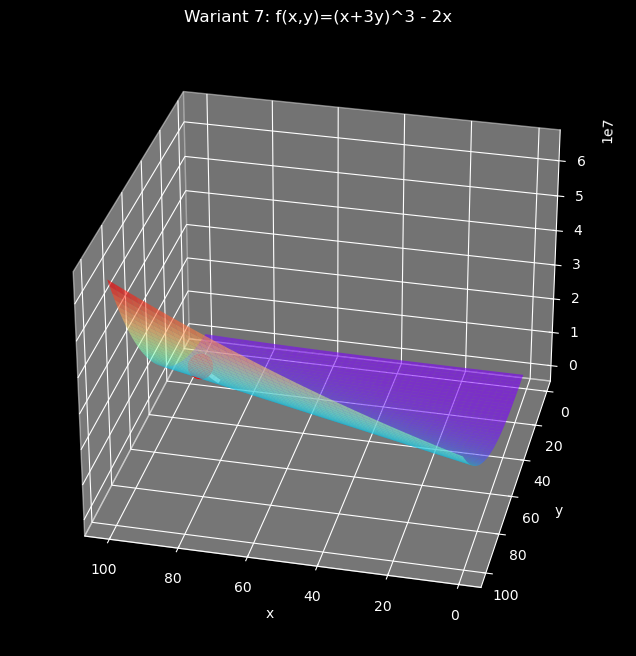

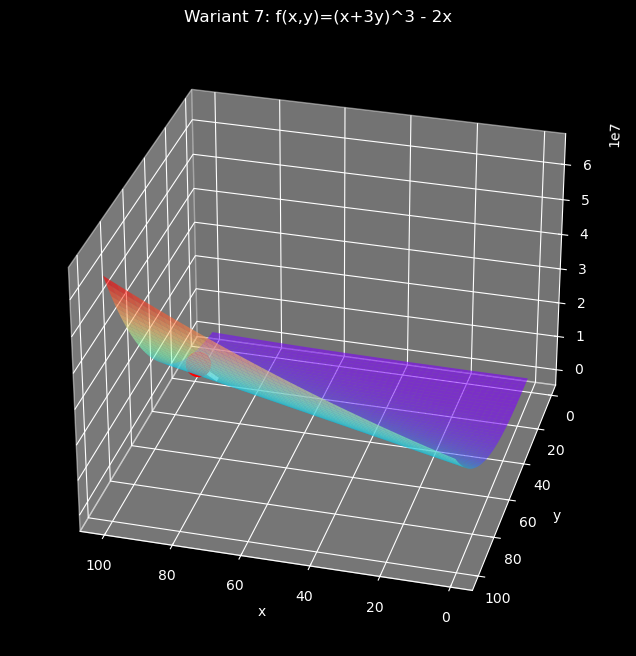

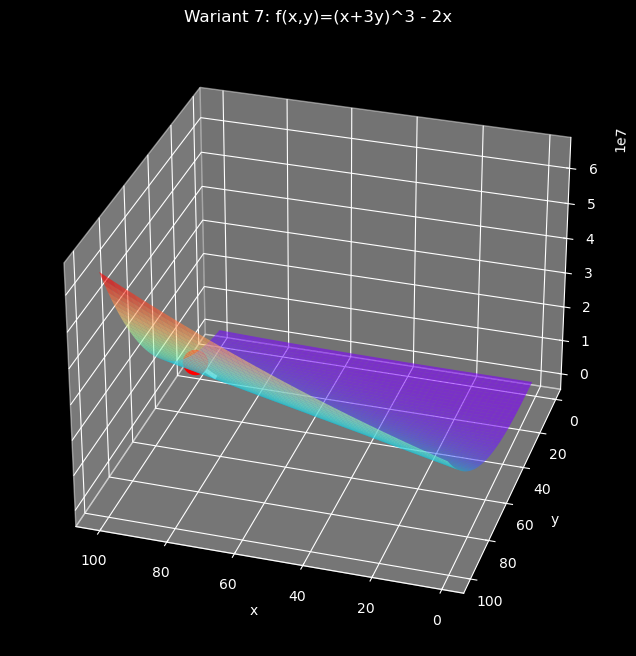

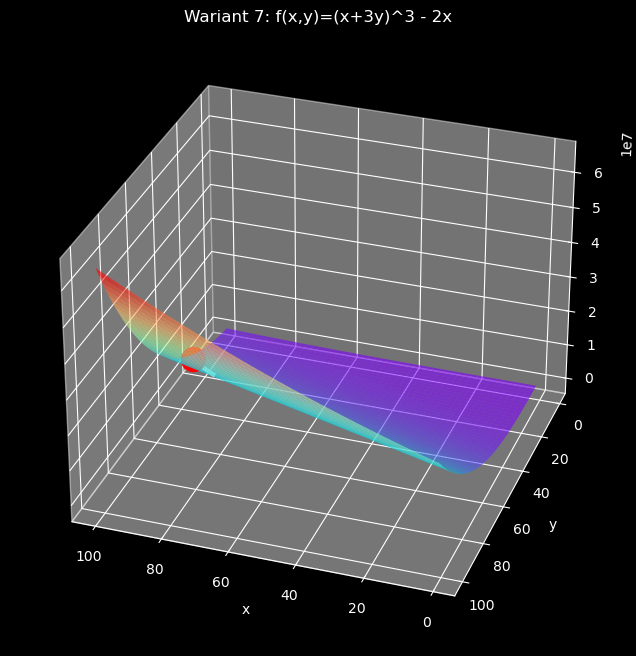

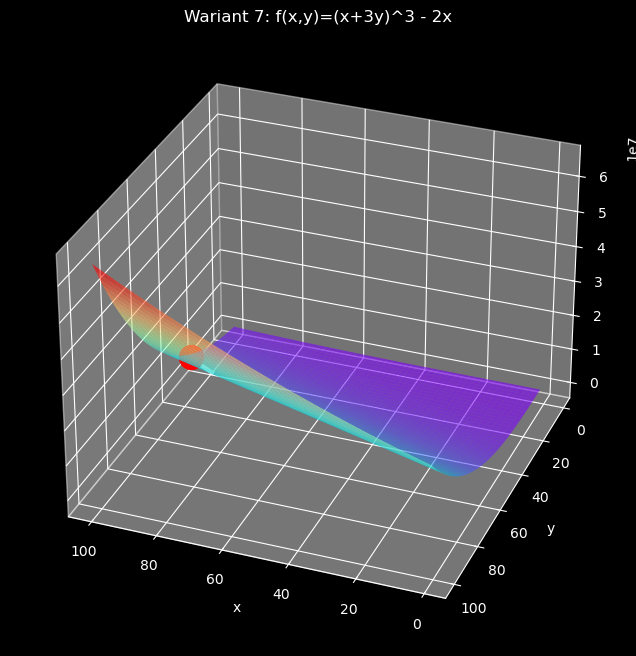

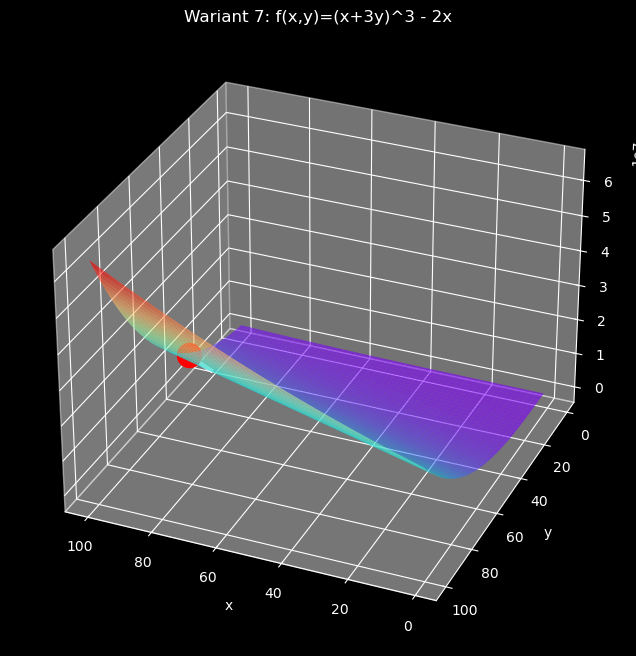

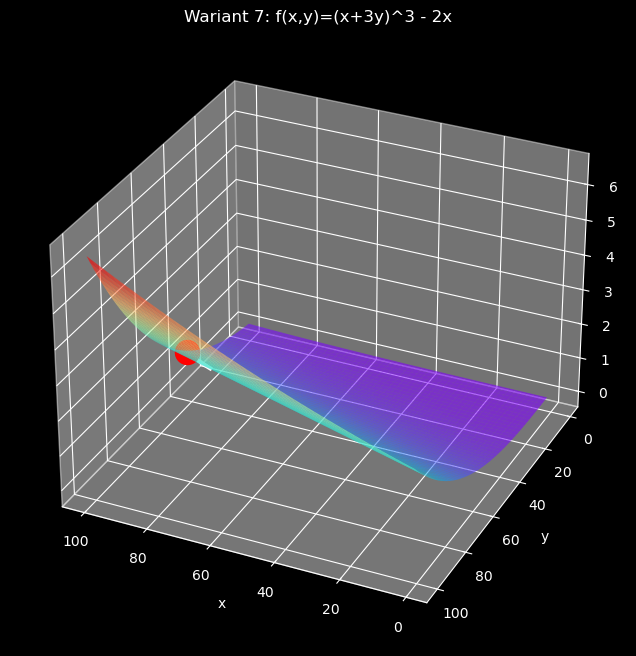

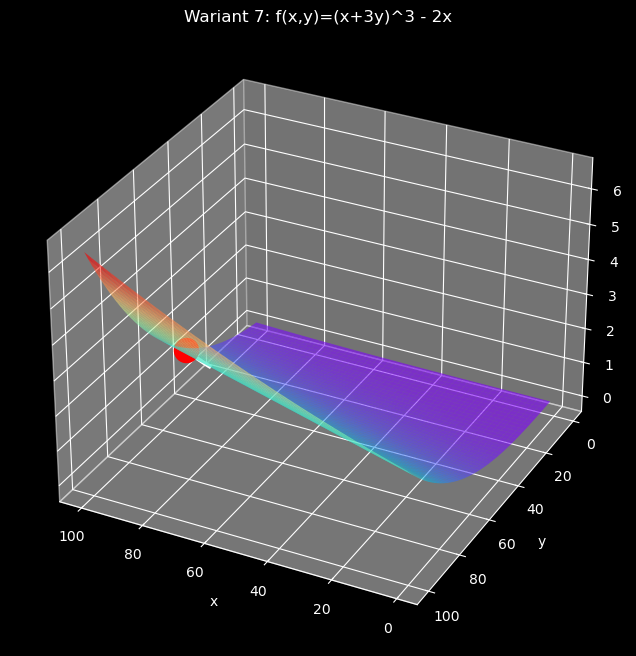

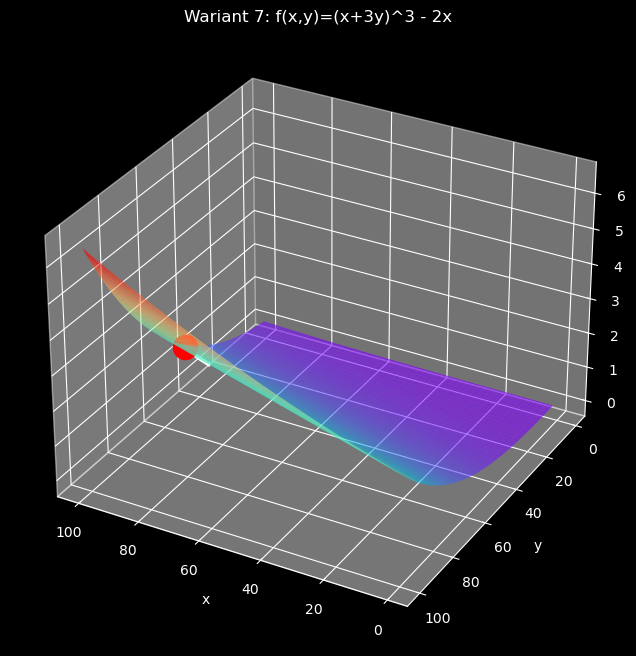

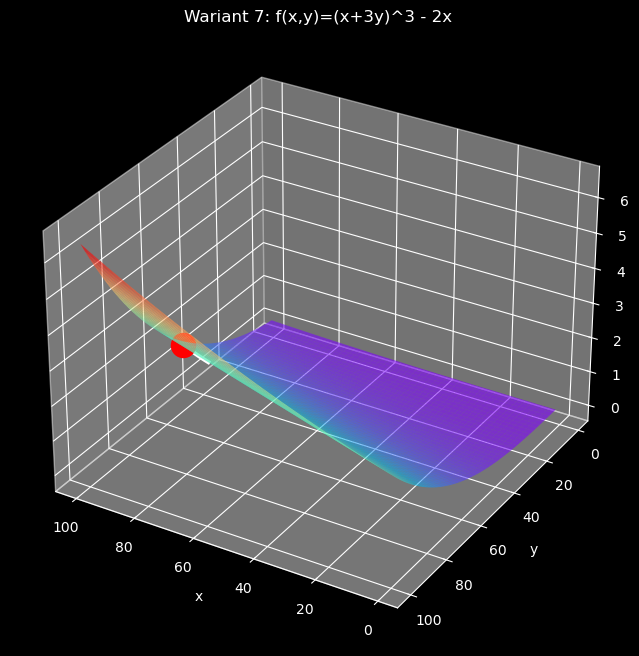

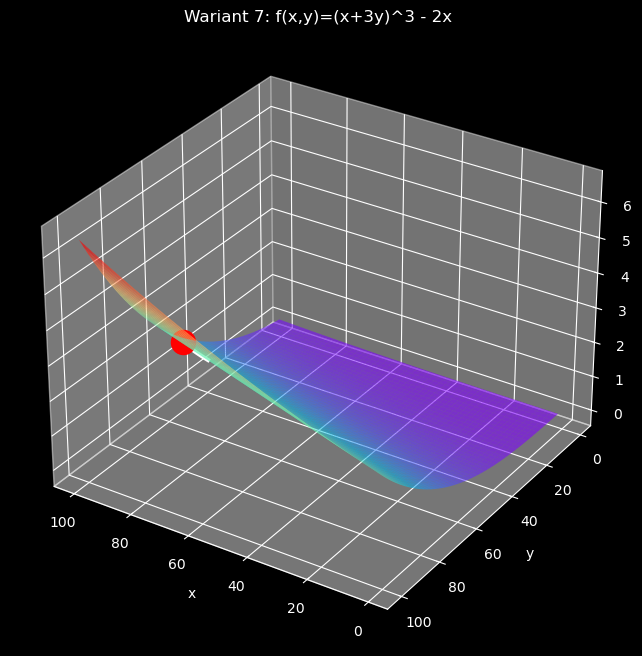

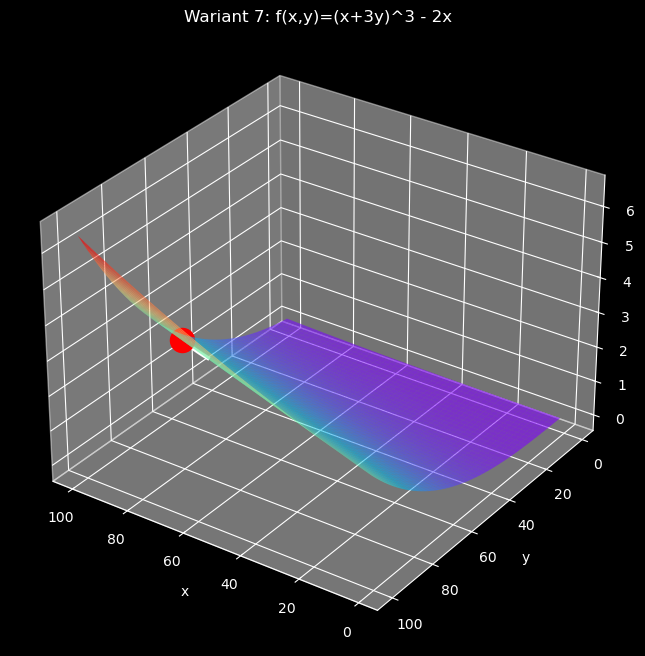

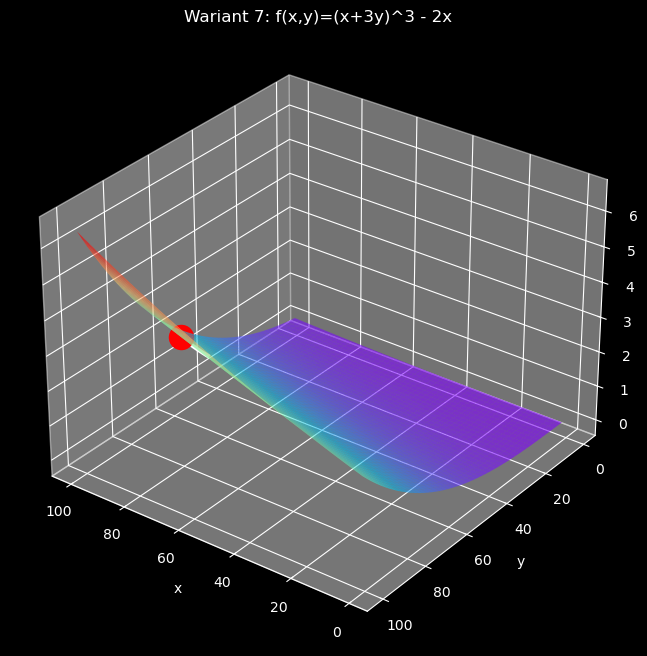

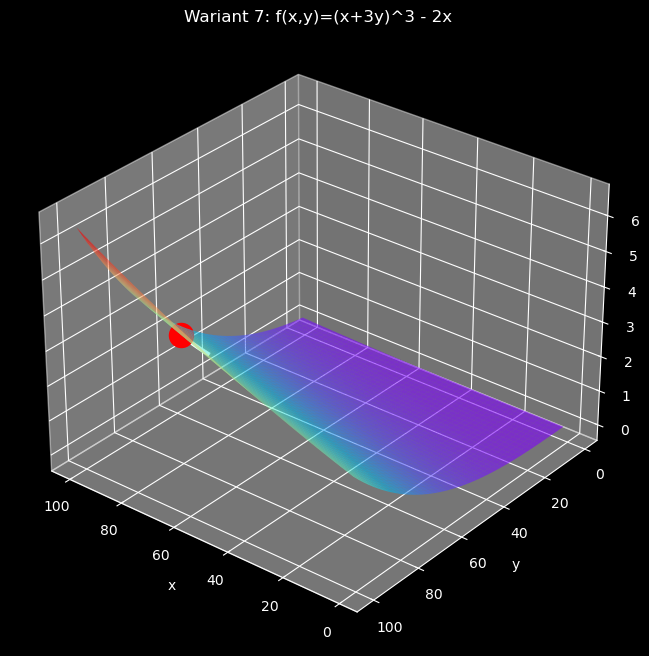

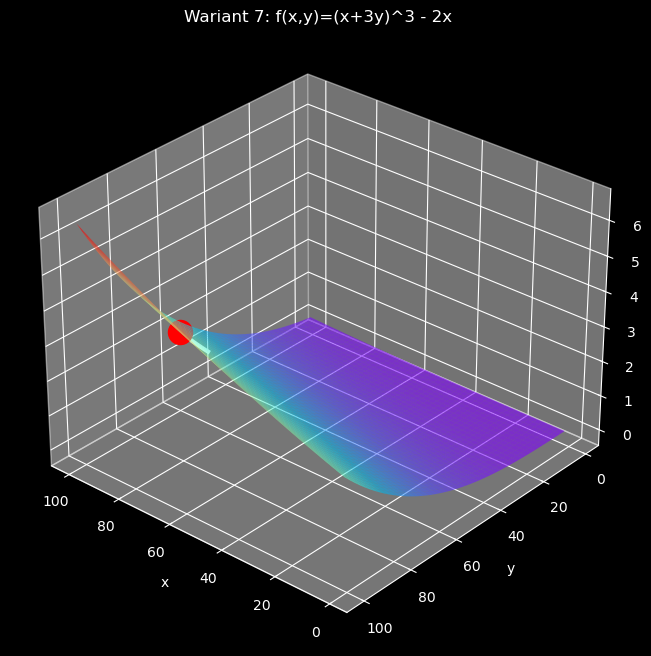

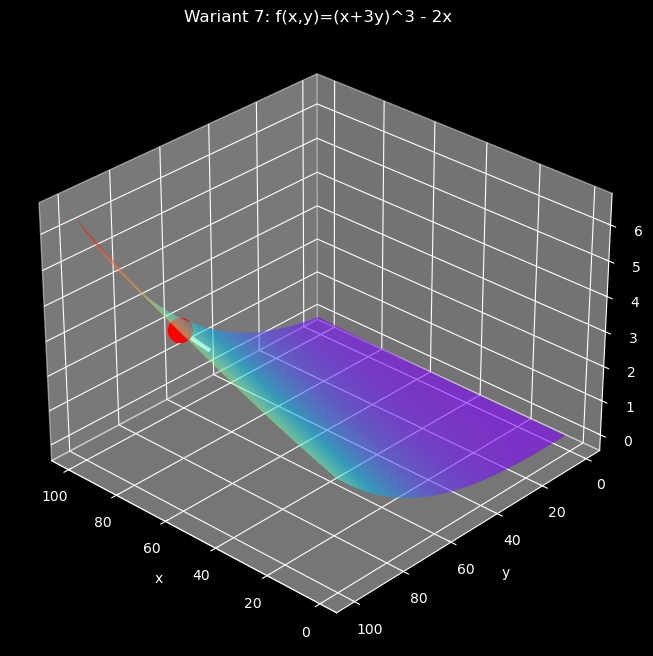

Zapisano klatki animacji w folderze gradient_descent_task7


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Utworzenie katalogu na klatki animacji (zgodnie z notebookiem)
OUTPUT_DIR = "gradient_descent_task7"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

# 1. Definicja zmiennych i funkcji celu dla Wariantu 7 
# Startujemy np. od środka zakresu, aby zobaczyć ruch
x = tf.Variable(80.0, dtype=tf.float32)
y = tf.Variable(80.0, dtype=tf.float32)

# f(x,y) = (x + 3y)^3 - 2x
def target_fn(x, y):
    return (x + 3 * y)**3 - 2 * x

# Optymalizator (Learning rate musi byc bardzo maly ze wzgledu na szescian w funkcji)
# W przeciwnym razie nastąpi "wybuch" gradientu (Exploding Gradient)
sgd = tf.keras.optimizers.SGD(learning_rate=0.0000001)

# Listy do przechowywania historii kroków dla wizualizacji
x_list, y_list, cost_list = [], [], []

# Pętla optymalizacji (symulacja z notebooka)
for i in range(100):
    with tf.GradientTape() as g:
        g.watch([x, y])
        loss = target_fn(x, y)
    
    # Obliczanie gradientów
    gradients = g.gradient(loss, [x, y])
    
    # Zapisywanie historii
    x_list.append(x.numpy())
    y_list.append(y.numpy())
    cost_list.append(loss.numpy())
    
    # Aktualizacja wag
    sgd.apply_gradients(zip(gradients, [x, y]))
    
    if i % 10 == 0:
        print(f"Krok {i}: x={x.numpy():.2f}, y={y.numpy():.2f}, f(x,y)={loss.numpy():.2f}")

# Wizualizacja 3D (adaptacja kodu z notebooka do zakresu zadania [1; 100])
print("Generowanie wykresów...")
for angle in range(0, 90, 2): # Zmniejszono liczbę klatek dla szybkości
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d') # Poprawiona składnia dla nowszych wersji MPL
    
    # Zakres zgodny z zadaniem [1, 100] 
    X_val = np.linspace(1, 100, 50)
    Y_val = np.linspace(1, 100, 50)
    x3D, y3D = np.meshgrid(X_val, Y_val)
    
    # Obliczanie wartości funkcji na siatce (używamy numpy dla szybkości)
    cost3D = (x3D + 3 * y3D)**3 - 2 * x3D
    
    ax.plot_surface(x3D, y3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.6)
    
    # Punkt startowy
    ax.scatter(x_list[0], y_list[0], zs=cost_list[0], s=300, c='r', label='Start')
    
    # Ścieżka gradientu
    ax.plot(x_list, y_list, zs=cost_list, zdir='z', c='white', lw=3, label='Gradient Path')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Wariant 7: f(x,y)=(x+3y)^3 - 2x')
    
    ax.view_init(30, 45 + angle)
    plt.show()
    filename = f"./{OUTPUT_DIR}/{makeIndexOfLength(angle, 3)}.png"
    plt.savefig(filename)
    plt.close()

print(f"Zapisano klatki animacji w folderze {OUTPUT_DIR}")